In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/samir/Downloads/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [6]:
#Changing the formate of date
df["Year"]=df['Date'].str.split('-').str[0].astype(int)
df["Month"]=df['Date'].str.split('-').str[1].astype(int)
df["date"]=df['Date'].str.split('-').str[2].astype(int)
df.drop(['Date'],axis=1,inplace=True)

In [7]:
#Changing object datatype to int 
leb_enc=LabelEncoder()

df2=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
#Encoding multiple column at once
df[df2]=df[df2].apply(LabelEncoder().fit_transform)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,date
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [11]:
df.fillna(value=0,inplace=True)

In [12]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
date             0
dtype: int64

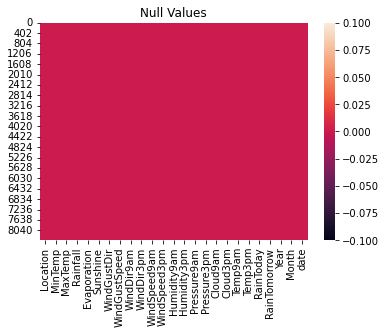

In [13]:
#Heatmap of null value (if there is any)
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [14]:
df.shape

(8425, 25)

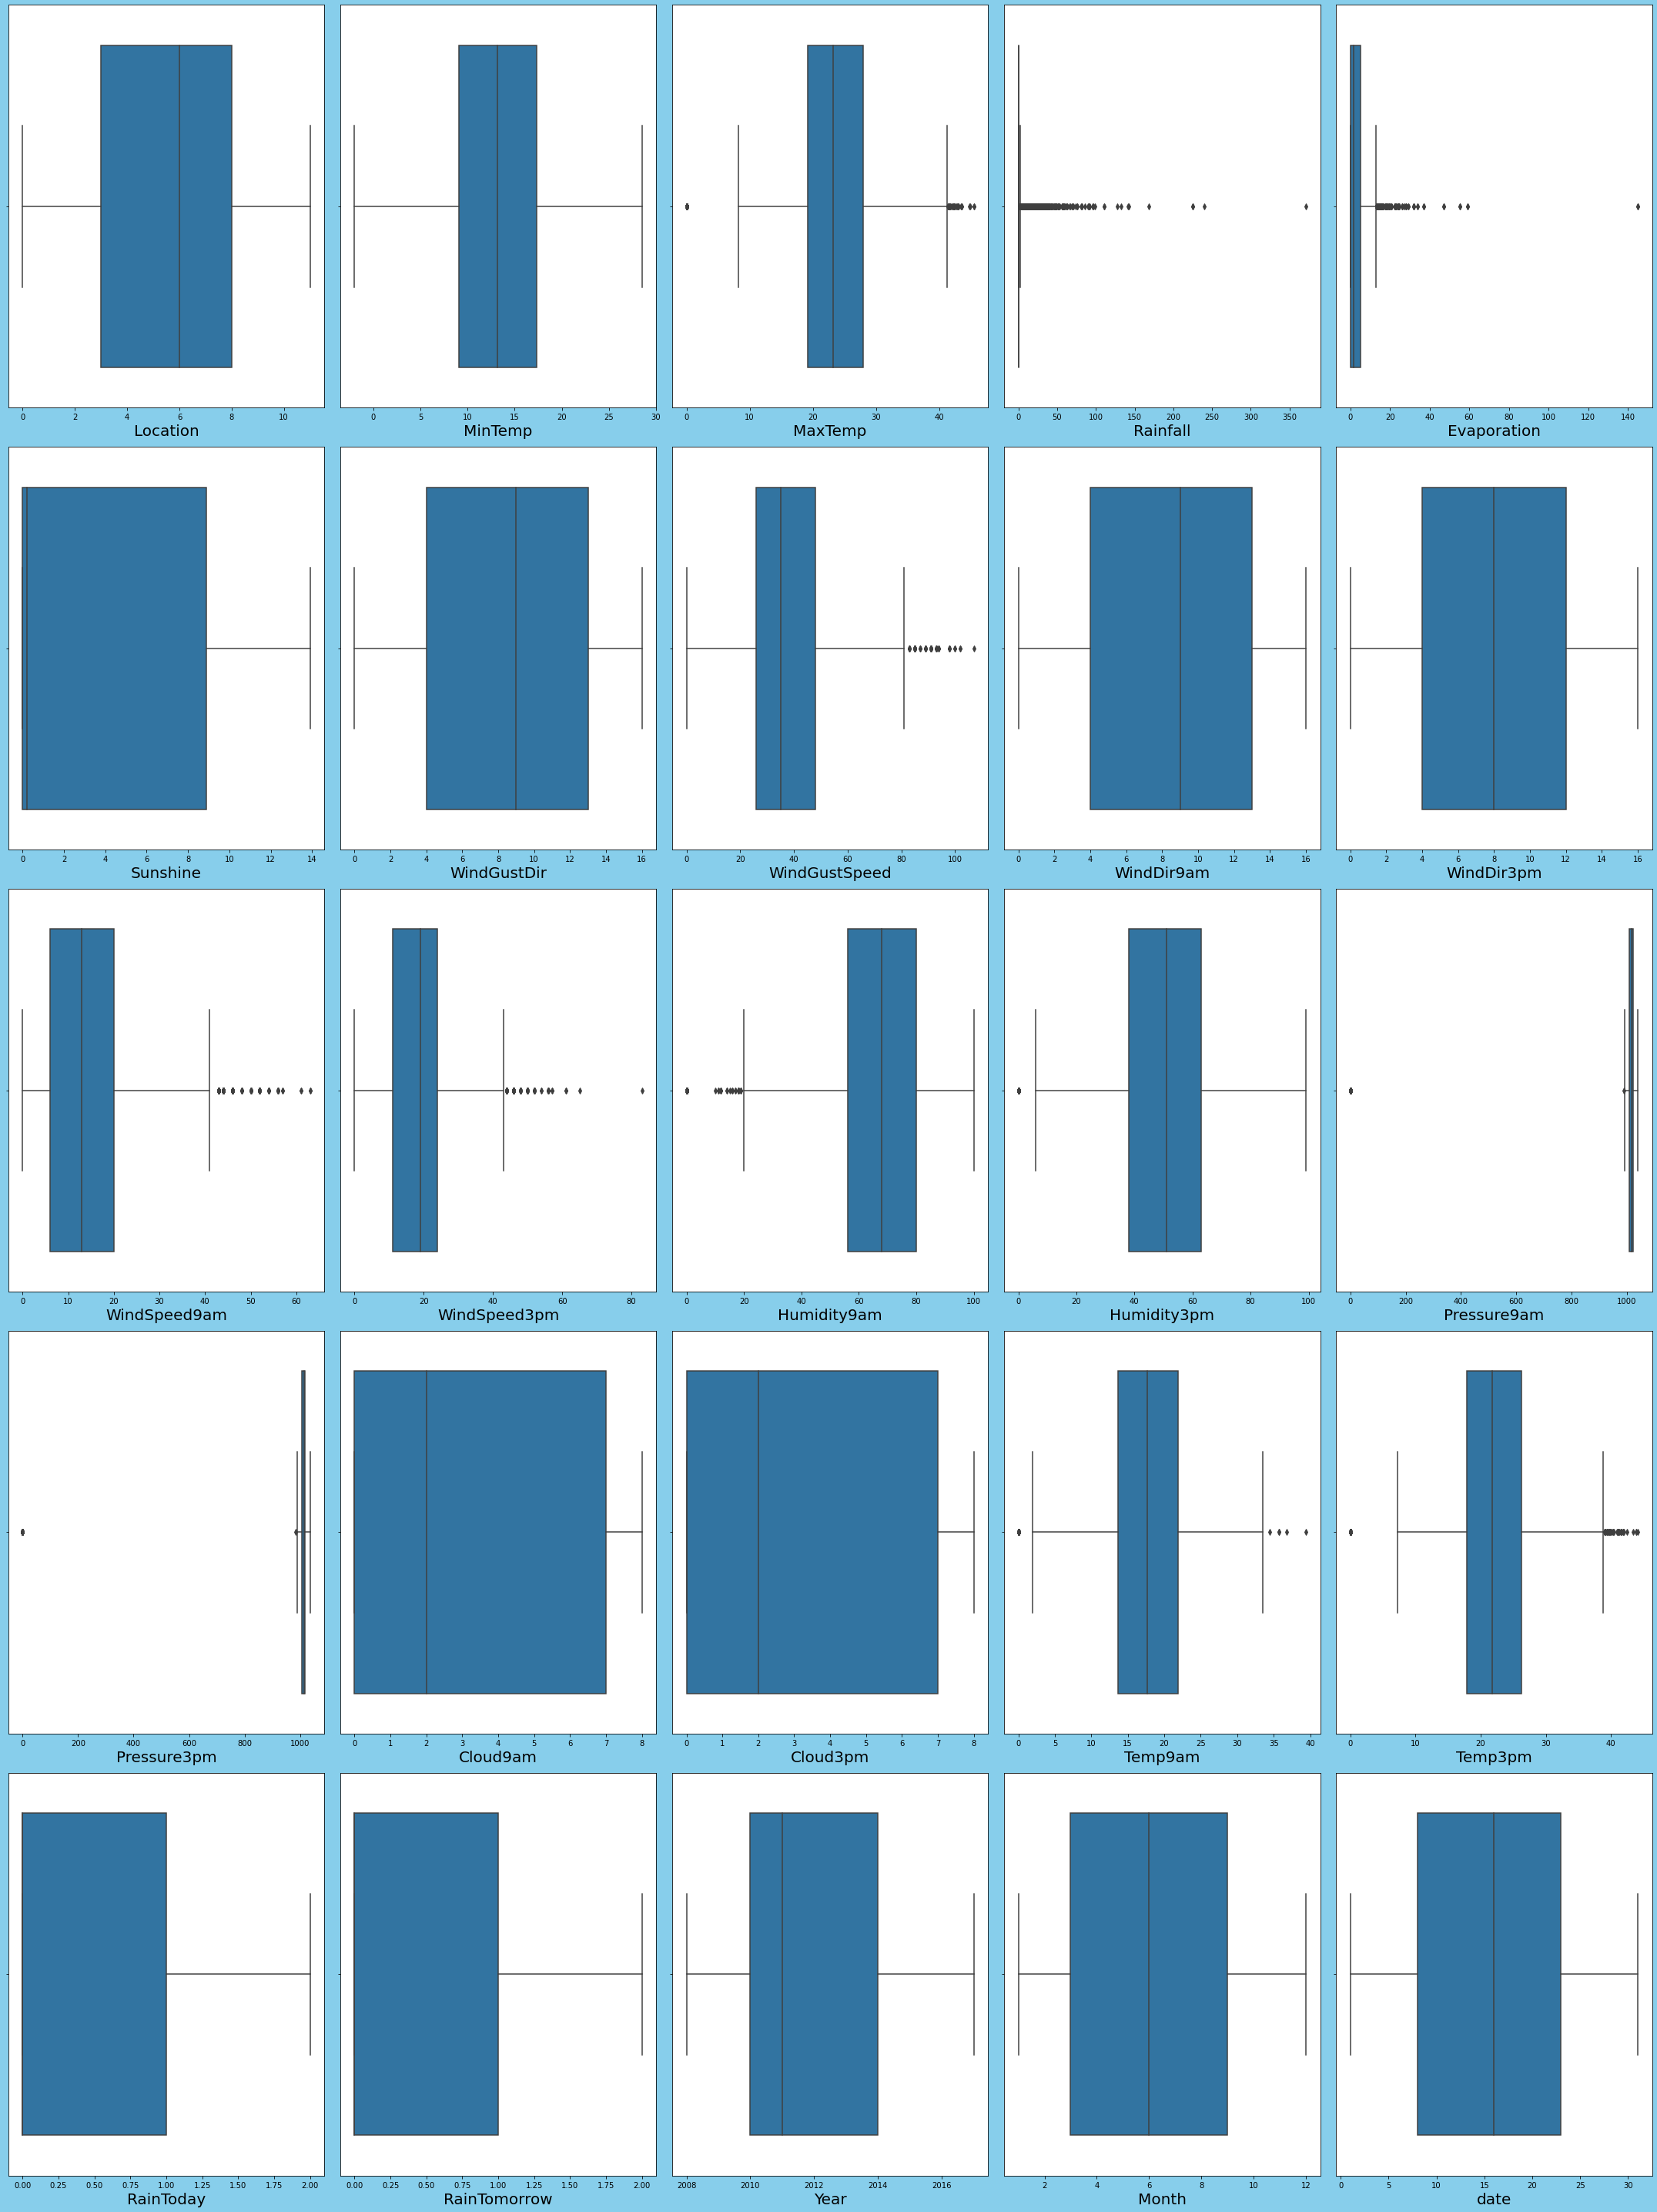

In [15]:
#Lets check the outlier for each column
plt.figure(figsize=(30,40),facecolor='skyblue')
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
#Finding the IQR(inter quantile range)to identify outliers
#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)
#IQR
iqr=q3-q1
iqr

Location          5.0
MinTemp           8.2
MaxTemp           8.8
Rainfall          0.8
Evaporation       5.2
Sunshine          8.9
WindGustDir       9.0
WindGustSpeed    22.0
WindDir9am        9.0
WindDir3pm        8.0
WindSpeed9am     14.0
WindSpeed3pm     13.0
Humidity9am      24.0
Humidity3pm      25.0
Pressure9am      12.0
Pressure3pm      11.8
Cloud9am          7.0
Cloud3pm          7.0
Temp9am           8.2
Temp3pm           8.4
RainToday         1.0
RainTomorrow      1.0
Year              4.0
Month             6.0
date             15.0
dtype: float64

In [17]:
#removing outliers from dataset
df=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df.shape

(5350, 25)

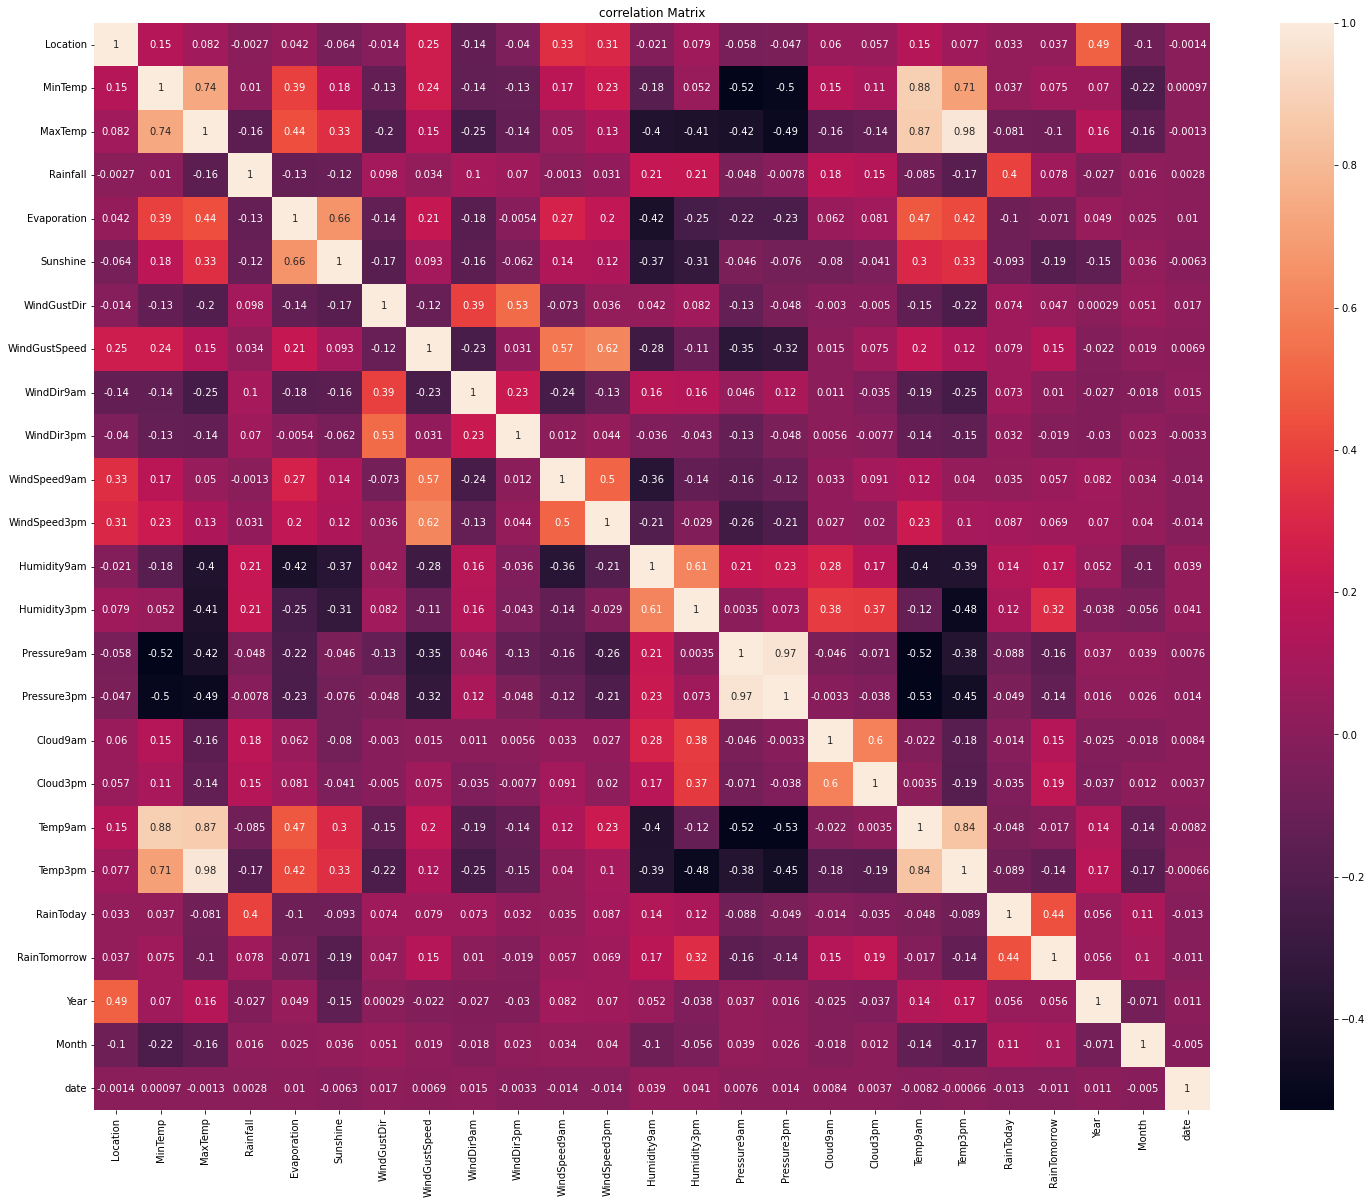

In [18]:
#Checking the multicollinearity
corr_mat = df.corr()
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [19]:
#Dividing data set into features and label
y=df['RainTomorrow']
x=df.drop(columns=['RainTomorrow'])

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 5350, dtype: int32

In [21]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,date
0,1,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,2008,12,1
1,1,7.4,25.1,0.0,0.0,0.0,14,44.0,6,15,...,1010.6,1007.8,0.0,0.0,17.2,24.3,0,2008,12,2
2,1,12.9,25.7,0.0,0.0,0.0,15,46.0,13,15,...,1007.6,1008.7,0.0,2.0,21.0,23.2,0,2008,12,3
3,1,9.2,28.0,0.0,0.0,0.0,4,24.0,9,0,...,1017.6,1012.8,0.0,0.0,18.1,26.5,0,2008,12,4
4,1,17.5,32.3,1.0,0.0,0.0,13,41.0,1,7,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,3.5,21.8,0.0,0.0,0.0,0,31.0,2,0,...,1024.7,1021.2,0.0,0.0,9.4,20.9,0,2017,6,20
8420,9,2.8,23.4,0.0,0.0,0.0,0,31.0,9,1,...,1024.6,1020.3,0.0,0.0,10.1,22.4,0,2017,6,21
8421,9,3.6,25.3,0.0,0.0,0.0,6,22.0,9,3,...,1023.5,1019.1,0.0,0.0,10.9,24.5,0,2017,6,22
8422,9,5.4,26.9,0.0,0.0,0.0,3,37.0,9,14,...,1021.0,1016.8,0.0,0.0,12.5,26.1,0,2017,6,23


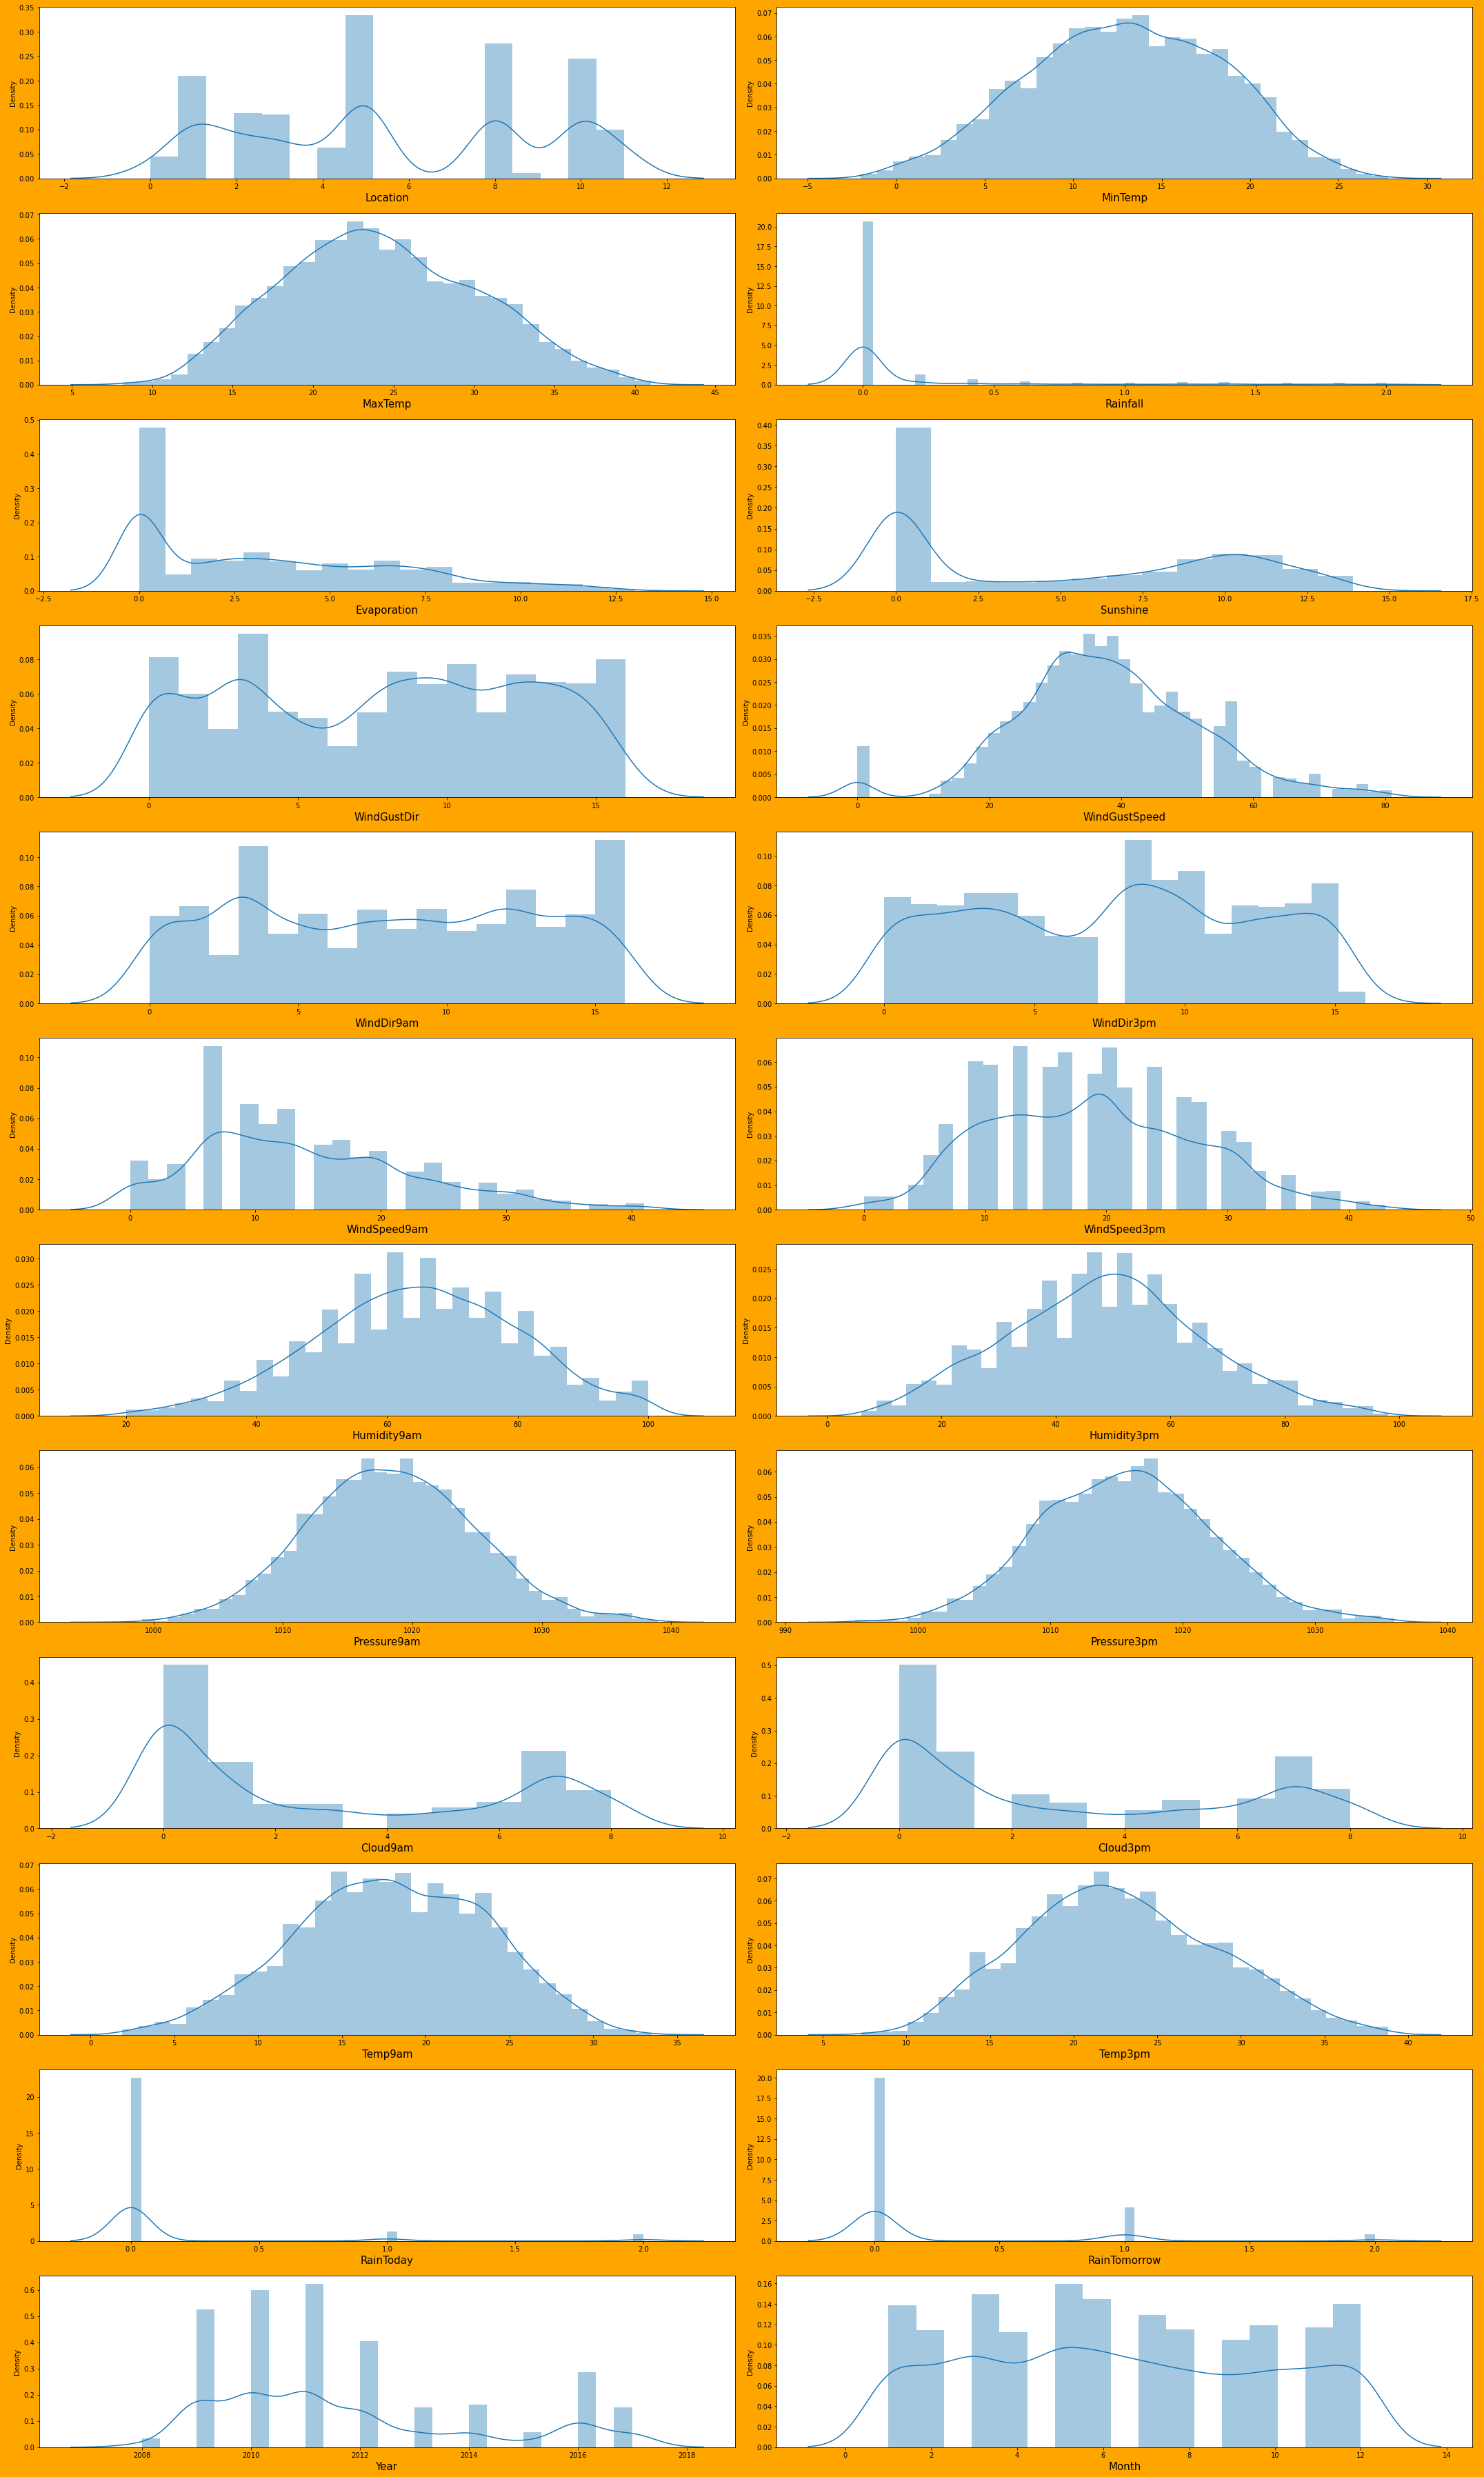

In [22]:
#Lets see how data is distributed for each column
plt.figure(figsize=(30,50),facecolor='orange')
plotnumber=1
for column in df:
    if plotnumber<=24:
        ax=plt.subplot(12,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [23]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,date
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000
mean,5.586168,12.962710,24.230206,0.135215,3.450692,5.120187,7.736075,37.934206,7.897196,7.647290,...,1015.733271,2.976262,2.948037,17.945981,22.819589,0.130093,0.229720,2011.673832,6.385234,15.815514
std,3.418188,5.500926,6.046335,0.386374,3.313773,4.940946,4.846751,13.825332,4.918431,4.664385,...,6.469704,3.069519,2.985274,5.693423,5.848145,0.434847,0.490454,2.429559,3.454726,8.760934
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,995.200000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,2.000000,9.000000,19.800000,0.000000,0.000000,0.000000,3.000000,30.000000,3.000000,4.000000,...,1011.100000,0.000000,0.000000,13.900000,18.600000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,5.000000,13.100000,23.800000,0.000000,2.800000,4.700000,8.000000,37.000000,8.000000,8.000000,...,1015.700000,1.000000,2.000000,18.000000,22.500000,0.000000,0.000000,2011.000000,6.000000,16.000000
75%,8.000000,17.100000,28.600000,0.000000,6.000000,10.000000,12.000000,46.000000,12.000000,12.000000,...,1020.000000,7.000000,6.000000,22.300000,26.900000,0.000000,0.000000,2013.000000,9.000000,23.000000
max,11.000000,27.800000,41.000000,2.000000,13.000000,13.900000,16.000000,81.000000,16.000000,16.000000,...,1036.000000,8.000000,8.000000,33.500000,38.800000,2.000000,2.000000,2017.000000,12.000000,31.000000


In [24]:
df.skew()

Location         0.072207
MinTemp         -0.084189
MaxTemp          0.175473
Rainfall         3.285705
Evaporation      0.663186
Sunshine         0.193409
WindGustDir     -0.076179
WindGustSpeed    0.139441
WindDir9am       0.010040
WindDir3pm      -0.030220
WindSpeed9am     0.624598
WindSpeed3pm     0.261159
Humidity9am     -0.122061
Humidity3pm      0.108116
Pressure9am      0.114608
Pressure3pm      0.112990
Cloud9am         0.454347
Cloud3pm         0.480718
Temp9am         -0.112399
Temp3pm          0.198859
RainToday        3.428684
RainTomorrow     2.056727
Year             0.837328
Month            0.083403
date            -0.019723
dtype: float64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       5350 non-null   int32  
 1   MinTemp        5350 non-null   float64
 2   MaxTemp        5350 non-null   float64
 3   Rainfall       5350 non-null   float64
 4   Evaporation    5350 non-null   float64
 5   Sunshine       5350 non-null   float64
 6   WindGustDir    5350 non-null   int32  
 7   WindGustSpeed  5350 non-null   float64
 8   WindDir9am     5350 non-null   int32  
 9   WindDir3pm     5350 non-null   int32  
 10  WindSpeed9am   5350 non-null   float64
 11  WindSpeed3pm   5350 non-null   float64
 12  Humidity9am    5350 non-null   float64
 13  Humidity3pm    5350 non-null   float64
 14  Pressure9am    5350 non-null   float64
 15  Pressure3pm    5350 non-null   float64
 16  Cloud9am       5350 non-null   float64
 17  Cloud3pm       5350 non-null   float64
 18  Temp9am 

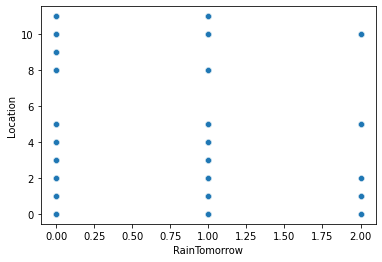

In [49]:
sns.scatterplot(x = 'RainTomorrow', y = 'Location', data = df)
plt.show()

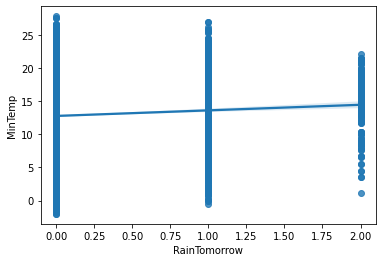

In [27]:
sns.regplot(x = 'RainTomorrow', y = 'MinTemp', data = df)
plt.show()

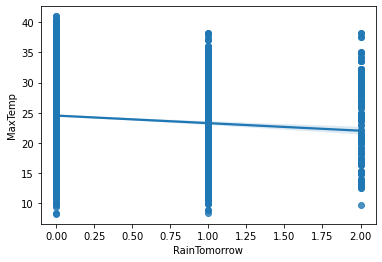

In [28]:
sns.regplot(x = 'RainTomorrow', y = 'MaxTemp', data = df)
plt.show()

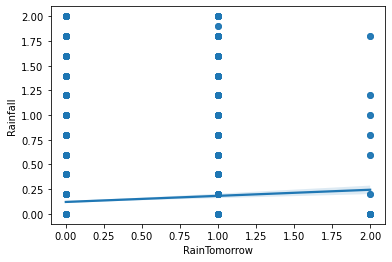

In [29]:
sns.regplot(x = 'RainTomorrow', y = 'Rainfall', data = df)
plt.show()

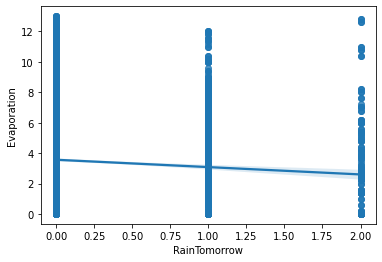

In [30]:
sns.regplot(x = 'RainTomorrow', y = 'Evaporation', data = df)
plt.show()

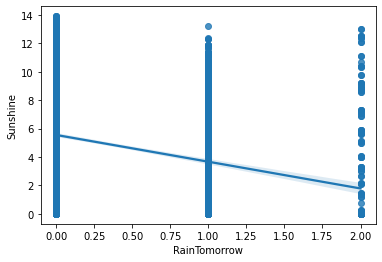

In [31]:
sns.regplot(x = 'RainTomorrow', y = 'Sunshine', data = df)
plt.show()

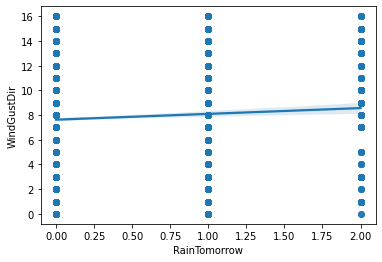

In [32]:
sns.regplot(x = 'RainTomorrow', y = 'WindGustDir', data = df)
plt.show()

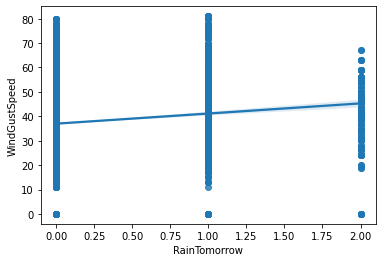

In [33]:
sns.regplot(x = 'RainTomorrow', y = 'WindGustSpeed', data = df)
plt.show()

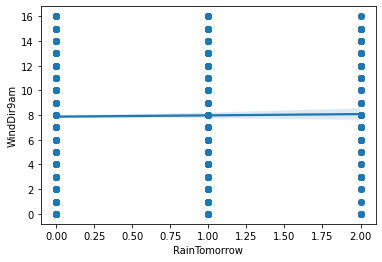

In [34]:
sns.regplot(x = 'RainTomorrow', y = 'WindDir9am', data = df)
plt.show()

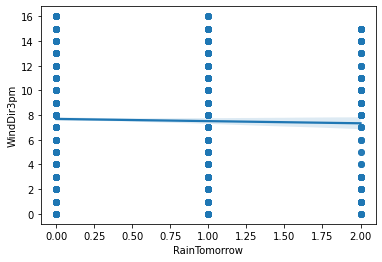

In [35]:
sns.regplot(x = 'RainTomorrow', y = 'WindDir3pm', data = df)
plt.show()

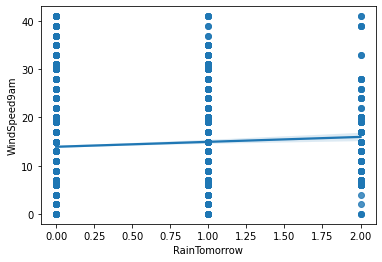

In [36]:
sns.regplot(x = 'RainTomorrow', y = 'WindSpeed9am', data = df)
plt.show()

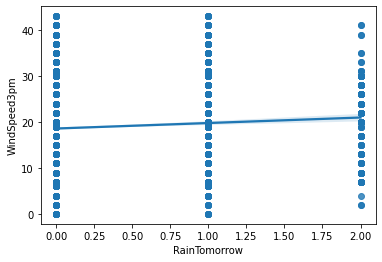

In [37]:
sns.regplot(x = 'RainTomorrow', y = 'WindSpeed3pm', data = df)
plt.show()

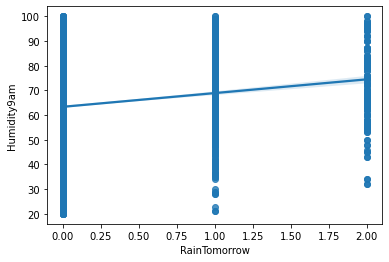

In [38]:
sns.regplot(x = 'RainTomorrow', y = 'Humidity9am', data = df)
plt.show()

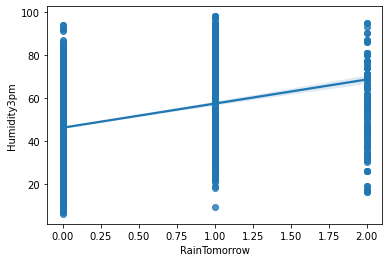

In [39]:
sns.regplot(x = 'RainTomorrow', y = 'Humidity3pm', data = df)
plt.show()

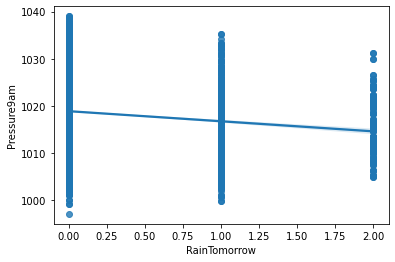

In [40]:
sns.regplot(x = 'RainTomorrow', y = 'Pressure9am', data = df)
plt.show()

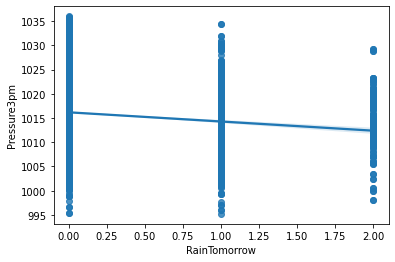

In [41]:
sns.regplot(x = 'RainTomorrow', y = 'Pressure3pm', data = df)
plt.show()

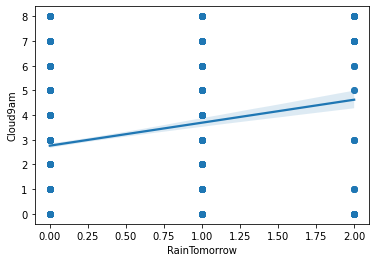

In [42]:
sns.regplot(x = 'RainTomorrow', y = 'Cloud9am', data = df)
plt.show()

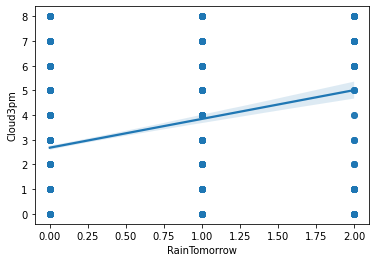

In [43]:
sns.regplot(x = 'RainTomorrow', y = 'Cloud3pm', data = df)
plt.show()

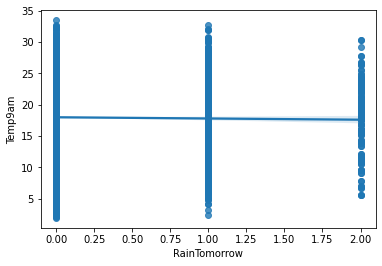

In [44]:
sns.regplot(x = 'RainTomorrow', y = 'Temp9am', data = df)
plt.show()

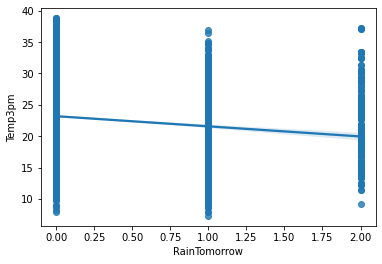

In [45]:
sns.regplot(x = 'RainTomorrow', y = 'Temp3pm', data = df)
plt.show()

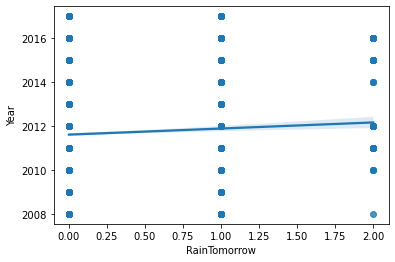

In [46]:
sns.regplot(x = 'RainTomorrow', y = 'Year', data = df)
plt.show()

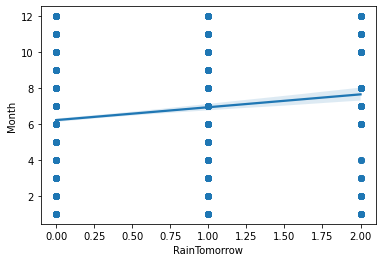

In [47]:
sns.regplot(x = 'RainTomorrow', y = 'Month', data = df)
plt.show()

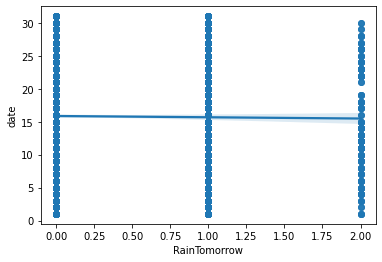

In [48]:
sns.regplot(x = 'RainTomorrow', y = 'date', data = df)
plt.show()

In [ ]:
#Droping the 
x=df.drop([''])

In [24]:
from sklearn.preprocessing import StandardScaler
#Scaling our data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [25]:
#Now after scaling we will check for multicollinearity using VIF
x_scaled.shape[1]

24

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [27]:
vif

,vif,Features
0,1.637318,Location
1,7.747928,MinTemp
2,35.188461,MaxTemp
3,1.302706,Rainfall
4,2.464746,Evaporation
5,2.180247,Sunshine
6,1.724286,WindGustDir
7,2.260791,WindGustSpeed
8,1.375184,WindDir9am
9,1.537669,WindDir3pm


In [28]:
#Let's split our data in test and train set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=47658)

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

#Let's see how well our model perform on the test dataset
y_predict=log_reg.predict(x_test)
y_predict

array([2, 0, 0, ..., 0, 0, 0])

In [29]:
log_reg.score(x_test, y_test)

0.8550074738415545

In [73]:
#saving the model
import pickle
#Saving the model
filename='wheather.pickel'
pickle.dump(log_reg,open(filename,'wb'))

In [31]:
#using Ridge and Lasso regression to check whether our model is overfited or not
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [32]:
LassoCV=LassoCV(alphas=None,max_iter=100,normalize=True)
LassoCV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [34]:
#best alpha parameter
alpha=LassoCV.alpha_
alpha

3.3050739162333006e-06

In [35]:
#Now that wehave best parameter,let's use Lasso regression and see how well our data has fitted before
Lasso_reg=Lasso(alpha)
Lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.3050739162333006e-06)

In [36]:
Lasso_reg.score(x_test,y_test)

0.405858732080815